In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Distribution of p-values

The point of this exercise is to try to get an idea about how p-values are distributed. The question was inspired by this [video](https://www.youtube.com/watch?v=ncqcFNHmMoc&t=334s) from NN Taleb.

Another useful resource:
- https://shiny.ieis.tue.nl/MOOC/assignment_1/

## Setting up

My assumptions are the following:
- $X_{old} \sim N(\mu_{old} = 100, \sigma = 15)$
- $H_{0}: \mu_{new} = 100$ vs. $H_{a}: \mu_{new} > 100$ (one-sided right-tail rejection region)
- $\alpha = 0.05$

In [2]:
mu_old = 100
sigma = 15

alpha = 0.05

## Algorithm 

1. draw one sample of size $n = 50$ assuming $X_{new} \sim N(\mu_{new} = 107, \sigma = 15)$. In this case: $\bar{X}_{new} \sim N(107, \frac{15}{\sqrt{50}})$
2. compute the mean ($\bar{x}$) of the sample above and $z_{obs} = \sqrt{n} \cdot \frac{\bar{x} - \mu_{old}}{\sigma}$
3. compute $p_{value} = P(Z > z_{obs})$

Given that the sample values are drawn such that the mean is 107 most of the time we should obtain p-values that would allow the rejection of $H_{0}$ for a certain significance level $\alpha$.

In [3]:
mu_new = 107
sample_size = 50
sample_mean_sdev = sigma / np.sqrt(sample_size)

simulations = 10**4

p_values = np.zeros(simulations)

for i in range(simulations):
    sample_mean = stats.norm.rvs(loc = mu_new, scale = sample_mean_sdev)
    z_obs = (sample_mean - mu_old) / sample_mean_sdev
    p_value = stats.norm.sf(z_obs)
    
    p_values[i] = p_value

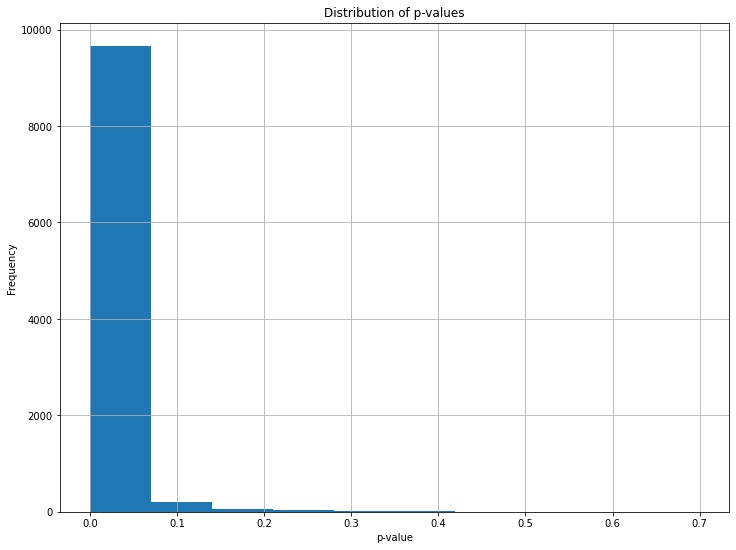

In [4]:
fig, ax = plt.subplots(figsize = (12, 9))

ax.grid()
ax.set_title("Distribution of p-values")
ax.set_xlabel("p-value")
ax.set_ylabel("Frequency")

ax.hist(p_values)


Output = None

It is interesting to observe that even though the sample was generated with $\mu_{new} = 107$ and $\sigma = 15$, there are still cases where the p-value would not allow to reject $H_{0}$.

In [5]:
print("The null hypotheses is not rejected in: {}% of the time.".format(
    sum((p_values > alpha)) / len(p_values) * 100
    )
)

The null hypotheses is not rejected in: 4.760000000000001% of the time.
